In [29]:
import config
import readability
import re
from tidyextractors.tidytwitter import TwitterExtractor
from nltk.tokenize import word_tokenize

# Your Twitter API credentails. See below for how to get them!
credentials = {
    'access_token': config.access_token,
    'access_secret': config.access_secret,
    'consumer_key': config.consumer_key,
    'consumer_secret': config.consumer_secret
}


In [8]:
# A list of users for data extraction.
users = ['realDonaldTrump','JoeBiden']

# Extract Twitter data.
tx = TwitterExtractor(users, extract_tweets=True, **credentials)

# Twitter user profile data in a Pandas DataFrame
user_df = tx.users(drop_collections=True)

# User/tweet keyed Pandas DataFrame
tweet_df = tx.tweets()

Extracted tweets by realDonaldTrump:   0%|          | 0/6400 [00:17<?, ?it/s]
Extracted tweets by realDonaldTrump: : 55416it [00:17, 3206.16it/s]          
Extracted tweets by realDonaldTrump: : 55416it [00:29, 3206.16it/s]
Extracted tweets by JoeBiden: : 55416it [00:32, 3206.16it/s]       
Extracting user data...: 100%|██████████| 2/2 [00:33<00:00, 16.51s/it]
Extracted tweets by JoeBiden: : 61129it [00:32, 1880.66it/s]
32110it [00:00, 622557.46it/s]       


In [9]:
tweet_df.head()

,id,id_str,lang,location,name,protected,screen_name,time_zone,utc_offset,tweet_id,tweets/created,tweets/text,tweets/retweet,tweets/rt_author
0,25073877,25073877,None,"Washington, DC",Donald J. Trump,False,realDonaldTrump,None,None,1302339764218204160,2020-09-05 20:16:10,Nancy Pelosi said she got “set up” by the owne...,False,
1,25073877,25073877,None,"Washington, DC",Donald J. Trump,False,realDonaldTrump,None,None,1302337719545274368,2020-09-05 20:08:03,Thank you! https://t.co/TgVkWA7irF,False,
2,25073877,25073877,None,"Washington, DC",Donald J. Trump,False,realDonaldTrump,None,None,1302334312159883264,2020-09-05 19:54:30,RT @QuickTake: LIVE: “These things could only ...,True,@QuickTake
3,25073877,25073877,None,"Washington, DC",Donald J. Trump,False,realDonaldTrump,None,None,1302334090197315586,2020-09-05 19:53:37,RT @AP: Serbia and Kosovo announce that they h...,True,@AP
4,25073877,25073877,None,"Washington, DC",Donald J. Trump,False,realDonaldTrump,None,None,1302310439993434119,2020-09-05 18:19:39,https://t.co/P8bokc3wEU,False,


In [39]:
trump_tweets = tweet_df[tweet_df['screen_name'] == 'realDonaldTrump']
biden_tweets = tweet_df[tweet_df['screen_name'] == 'JoeBiden']
print("number of tweets from trump: ", trump_tweets.count()[0])
print("number of tweets from biden: ", biden_tweets.count()[0])


number of tweets from trump:  3208
number of tweets from biden:  3214


In [40]:

trump_texts_list = trump_tweets['tweets/text'].tolist()
trump_texts_string = '\n'.join(trump_texts_list)
trump_texts_string = re.sub('https?://[A-Za-z0-9./]+','',trump_texts_string)

results = readability.getmeasures(trump_texts, lang='en')
print("Trump's tweet readability grade level: ", results['readability grades']['ARI'])

Trump's tweet readability grade level:  8.990020543551136


In [47]:

biden_texts_list = biden_tweets['tweets/text'].tolist()
biden_texts_string = '\n'.join(biden_texts_list)
biden_texts_string = re.sub('https?://[A-Za-z0-9./]+','',biden_texts_string)
results = readability.getmeasures(biden_texts, lang='en')
print("Biden's tweet readability grade level: ", results['readability grades']['ARI'])

Biden's tweet readability grade level:  9.118893303723297


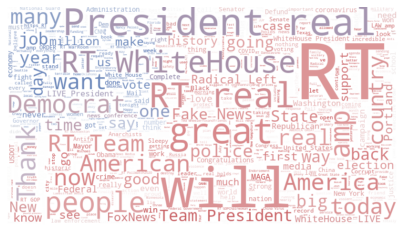

In [85]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

#filter words
words_to_remove = ['Donald', 'Trump']
for words in words_to_remove:
    trump_texts_string = trump_texts_string.replace(words,'')

# fix image format
Image.open("img/us.png").convert('RGB').save("img/us.rgb")

mask = np.array(Image.open("img/us.rgb"))
wordcloud_usa = WordCloud(stopwords=set(STOPWORDS), background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(trump_texts_string)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("img/us_trump.png", format="png")


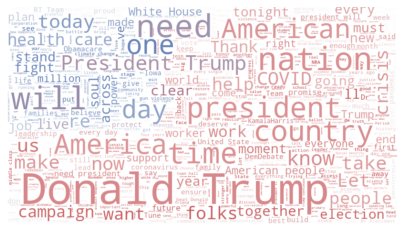

In [86]:
#filter words
words_to_remove = ['Joe', 'Biden']
for words in words_to_remove:
    biden_texts_string = biden_texts_string.replace(words,'')

mask = np.array(Image.open("img/us.rgb"))
wordcloud_usa = WordCloud(stopwords=set(STOPWORDS), background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(biden_texts_string)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("img/us_biden.png", format="png")

plt.show()